In [40]:
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda:0')
steps  = 101
m    = .9575
p    = torch.tensor(.8)
sig  = 1
k    = 3
d    = 10000
bs   = 100
h    = torch.log(p/(1-p))/2
x    = torch.randn(d, bs, device=device) * d**(1/2)
xs   = [x]

tau  = lambda t: (1-(k/d**(1/2))**2)**(1/2)*2*t if t < 1/2 else (1-(k*(2-2*t)/d**(1/2))**2)**(1/2)
taup = lambda t: (1-(k/d**(1/2))**2)**(1/2)*2 if t < 1/2 else 2*k**2*(2-2*t)/(d * tau(t))
ones = torch.ones(d, device=device)

den  = lambda t: d * (1-tau(t)**2) + sig**2 * tau(t)**2
bf   = lambda x, t: -(d-sig**2)*tau(t)*taup(t)/den(t) * x + d*taup(t)/den(t) * m * torch.outer(ones, torch.tanh(m*h + tau(t) * m * ones @ x / den(t)))

#ts1  = torch.linspace(0, 1-d**(-1/4), 100)[:-1]
#ts2  = torch.linspace(1-d**(-1/4), 1-d**(-1/2), 100)[:-1]
#ts3  = torch.linspace(1-d**(-1/2), 1, 100)
ts   = torch.linspace(0,1, steps)
#ts   = torch.cat((ts1, ts2, ts3))

for i, t in enumerate(ts[:-1]):
    if i % 10 == 0: print(t)
    dt = ts[i+1] - ts[i]
    x = x + bf(x, t) * dt
    xs.append(x)

xs = torch.stack(xs)

tensor(0.)
tensor(0.1000)
tensor(0.2000)
tensor(0.3000)
tensor(0.4000)
tensor(0.5000)
tensor(0.6000)
tensor(0.7000)
tensor(0.8000)
tensor(0.9000)


In [41]:
torch.std(xs[-1, :, 0])

tensor(3.6690, device='cuda:0')

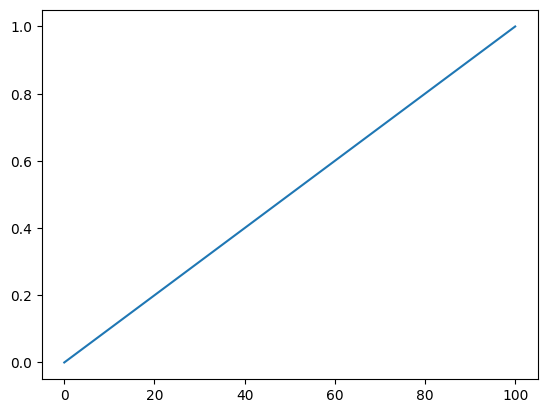

In [42]:
plt.plot(ts)

In [43]:
ms = xs.mean(1).cpu().numpy()

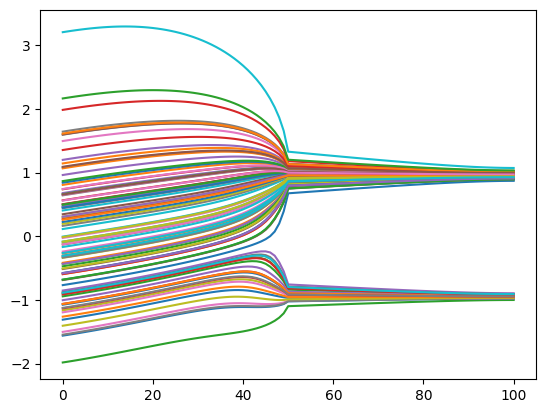

In [44]:
plt.plot(ms);
#plt.ylim(-.05,.05)

(-20.0, 20.0)

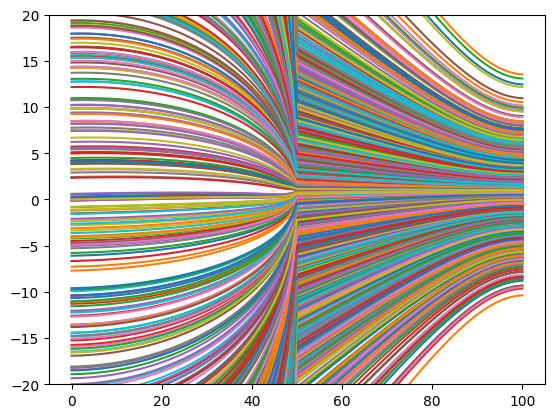

In [45]:
plt.plot(xs[:, :1000, 0].cpu().numpy());
plt.ylim(-20, 20)

In [39]:
torch.std(xs[-1, :, 0])

tensor(0.0049, device='cuda:0')